<a href="https://colab.research.google.com/github/sari-ka/image_caption_generator/blob/main/Image_caption_generator_blip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install transformers==4.44.2 datasets==3.0.1 accelerate==0.34.2 torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
  Attempting 

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Load pretrained BLIP model
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

# --- TEST on a sample image ---
# Upload any one image first (from the Colab file menu or left panel → "Files" → Upload)
image_path = "/content/sample_data/closeup.jpg"  # change if your file name is different
image = Image.open(image_path).convert("RGB")

# Generate caption
inputs = processor(images=image, return_tensors="pt")
output = model.generate(**inputs, max_new_tokens=30)

caption = processor.decode(output[0], skip_special_tokens=True)
print("🟢 Generated Caption:", caption)


🟢 Generated Caption: a woman with frng frng on her face


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd

# 👇 change this path to your actual captions.txt file
txt_path = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions.txt"
csv_output_path = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions.csv"

image_paths = []
captions = []

with open(txt_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # split line into image name and caption
        parts = line.split(',', 1)
        if len(parts) == 1:  # fallback if no comma, split by space
            parts = line.split(' ', 1)
        if len(parts) == 2:
            img, cap = parts
            image_paths.append(img.strip())
            captions.append(cap.strip())

# create dataframe and save as csv
df = pd.DataFrame({'image': image_paths, 'text': captions})
df.to_csv(csv_output_path, index=False)

print(f"✅ Conversion complete! Saved to: {csv_output_path}")
print("Sample rows:")
print(df.head())



✅ Conversion complete! Saved to: /content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions.csv
Sample rows:
                             image  \
0  1000268201_693b08cb0e\tstartseq   
1  1000268201_693b08cb0e\tstartseq   
2  1000268201_693b08cb0e\tstartseq   
3  1000268201_693b08cb0e\tstartseq   
4  1000268201_693b08cb0e\tstartseq   

                                                text  
0  a child in a pink dress is climbing up a set o...  
1         a girl going into a wooden building endseq  
2  a little girl climbing into a wooden playhouse...  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  


In [ ]:
import pandas as pd
import re

csv_path = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions.csv"  # change if needed
clean_csv_path = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions_clean.csv"

df = pd.read_csv(csv_path)

# Clean image names and remove unwanted text tokens
df['image'] = df['image'].apply(lambda x: re.sub(r'[\t\s]+.*', '', str(x).strip()))  # remove everything after tab/space
df['image'] = df['image'].apply(lambda x: x if x.endswith('.jpg') else x + '.jpg')   # ensure .jpg extension
df['text'] = df['text'].apply(lambda x: re.sub(r'(startseq|endseq)', '', str(x)).strip())  # remove startseq/endseq

df.to_csv(clean_csv_path, index=False)
print("✅ Cleaned captions saved to:", clean_csv_path)
print(df.head())


✅ Cleaned captions saved to: /content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions_clean.csv
                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                                text  
0  a child in a pink dress is climbing up a set o...  
1                a girl going into a wooden building  
2     a little girl climbing into a wooden playhouse  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  


Total samples: 35000
                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                                text  
0  a child in a pink dress is climbing up a set o...  
1                a girl going into a wooden building  
2     a little girl climbing into a wooden playhouse  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  

[1] /content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/train_val_data/Flicker8k_Dataset/1000268201_693b08cb0e.jpg -> a child in a pink dress is climbing up a set of stairs in an entry way


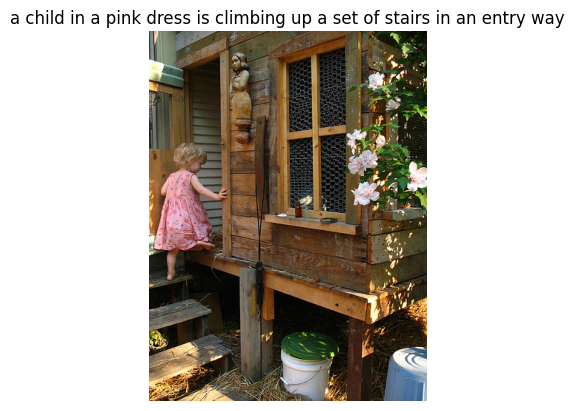


[2] /content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/train_val_data/Flicker8k_Dataset/1000268201_693b08cb0e.jpg -> a girl going into a wooden building


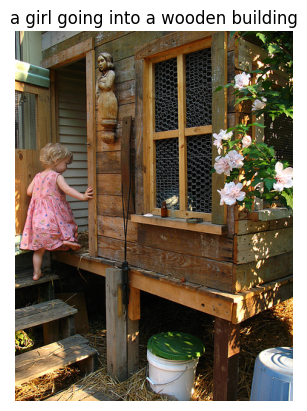


[3] /content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/train_val_data/Flicker8k_Dataset/1000268201_693b08cb0e.jpg -> a little girl climbing into a wooden playhouse


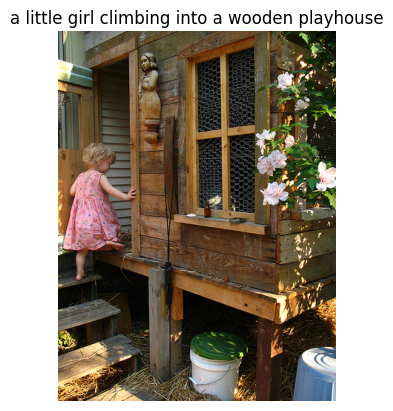

In [ ]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

# 👇 change this path if your captions.csv is in a different folder
csv_path = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions_clean.csv"
images_dir = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/train_val_data/Flicker8k_Dataset"  # folder where your images are stored

# load CSV
df = pd.read_csv(csv_path)
print("Total samples:", len(df))
print(df.head())

# display 3 sample images with their captions
for i in range(3):
    img_path = os.path.join(images_dir, df.iloc[i]['image'])
    caption = df.iloc[i]['text']
    print(f"\n[{i+1}] {img_path} -> {caption}")

    if os.path.exists(img_path):
        img = Image.open(img_path).convert("RGB")
        plt.imshow(img)
        plt.axis('off')
        plt.title(caption)
        plt.show()
    else:
        print(f"⚠️ Image not found at: {img_path}")


In [ ]:
from datasets import load_dataset

# 👇 change paths if your files are in a different folder
csv_path = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/model_data/captions_clean.csv"
images_dir = "/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/train_val_data/Flicker8k_Dataset"

# Load dataset from CSV for BLIP
dataset = load_dataset(
    "csv",
    data_files={"train": csv_path},  # we’ll later split into train/val if needed
)

# Add full image paths (so BLIP can open them)
def add_image_path(example):
    example["image"] = os.path.join(images_dir, example["image"])
    return example

dataset = dataset.map(add_image_path)

print("✅ Dataset loaded for BLIP fine-tuning")
print(dataset)
print("Sample entry:")
print(dataset["train"][0])


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

✅ Dataset loaded for BLIP fine-tuning
DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 35000
    })
})
Sample entry:
{'image': '/content/drive/MyDrive/Colab/Image_Caption_Generator/Image-Caption-Generator/train_val_data/Flicker8k_Dataset/1000268201_693b08cb0e.jpg', 'text': 'a child in a pink dress is climbing up a set of stairs in an entry way'}


In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration, TrainingArguments, Trainer
from PIL import Image
import torch

# Load pretrained BLIP base model + processor
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

# Prepare data collator for BLIP
def collate_fn(batch):
    images = [Image.open(example["image"]).convert("RGB") for example in batch]
    captions = [example["text"] for example in batch]
    inputs = processor(
        images=images,
        text=captions,
        return_tensors="pt",
        padding=True,
        truncation=True,
    )
    inputs = {k: v.to("cuda") for k, v in inputs.items()}
    return inputs

# Training configuration (no training yet!)
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/BLIP_finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    fp16=True,
    logging_steps=50,
    save_total_limit=2,
)

# Initialize Trainer (we won’t call train() yet)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    data_collator=collate_fn,
)

print("✅ Step 8A complete — Trainer setup done successfully.")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


✅ Step 8A complete — Trainer setup done successfully.


In [ ]:
# ✅ Step 8B — Fine-tune BLIP on your dataset (final version)
import os
os.environ["WANDB_DISABLED"] = "true"  # 🚫 Disable Weights & Biases logging

from transformers import TrainingArguments, Trainer
from PIL import Image

# Reuse model, processor, dataset, and collate_fn from earlier cells

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/BLIP_finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    fp16=True,
    logging_steps=50,
    save_total_limit=2,
    remove_unused_columns=False,   # ✅ critical fix for image/text columns
    report_to=[]                   # no external loggers (keeps output clean)
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    data_collator=collate_fn,
)

# 🚀 Start training
print("Starting fine-tuning... this may take a while ⏳")
train_output = trainer.train()

# 💾 Save fine-tuned model and processor to Drive
save_path = "/content/drive/MyDrive/BLIP_finetuned/final_model"
trainer.save_model(save_path)
processor.save_pretrained(save_path)

print("\n✅ Fine-tuning complete!")
print(f"Model saved at: {save_path}")


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Starting fine-tuning... this may take a while ⏳


RuntimeError: cannot pin 'torch.cuda.FloatTensor' only dense CPU tensors can be pinned

In [ ]:
# ✅ Step 8C — Final stable fine-tuning setup (no pin_memory error, no wandb)

import os
os.environ["WANDB_DISABLED"] = "true"

from transformers import TrainingArguments, Trainer
from PIL import Image

# ✅ Updated collate function — keep on CPU
def collate_fn(batch):
    images = [Image.open(example["image"]).convert("RGB") for example in batch]
    captions = [example["text"] for example in batch]
    inputs = processor(
        images=images,
        text=captions,
        return_tensors="pt",
        padding=True,
        truncation=True,
    )
    # Do NOT send to GPU here — Trainer will handle that automatically
    return inputs

# ✅ Training configuration (stable)
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/BLIP_finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    fp16=True,
    logging_steps=50,
    save_total_limit=2,
    remove_unused_columns=False,
    report_to=[]
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    data_collator=collate_fn,
)

# 🚀 Start fine-tuning
print("Starting fine-tuning... this may take a while ⏳")
train_output = trainer.train()

# 💾 Save fine-tuned model and processor
save_path = "/content/drive/MyDrive/BLIP_finetuned/final_model"
trainer.save_model(save_path)
processor.save_pretrained(save_path)

print("\n✅ Fine-tuning complete!")
print(f"Model saved at: {save_path}")


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Starting fine-tuning... this may take a while ⏳


ValueError: The model did not return a loss from the inputs, only the following keys: logits,image_embeds,last_hidden_state. For reference, the inputs it received are pixel_values,input_ids,attention_mask.

In [ ]:
# ✅ Step 8D — Final BLIP fine-tuning (with correct loss computation)
import os
os.environ["WANDB_DISABLED"] = "true"

from transformers import TrainingArguments, Trainer
from PIL import Image
import torch

# ✅ Fixed collate function with labels
def collate_fn(batch):
    images = [Image.open(example["image"]).convert("RGB") for example in batch]
    captions = [example["text"] for example in batch]

    inputs = processor(
        images=images,
        text=captions,
        return_tensors="pt",
        padding=True,
        truncation=True,
    )

    # Create labels identical to input_ids but ignore padding tokens
    labels = inputs["input_ids"].clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100
    inputs["labels"] = labels
    return inputs  # keep tensors on CPU; Trainer moves them to GPU

# ✅ Training configuration
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/BLIP_finetuned",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    fp16=True,
    logging_steps=50,
    save_total_limit=2,
    remove_unused_columns=False,
    report_to=[]
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    data_collator=collate_fn,
)

# 🚀 Start fine-tuning
print("Starting fine-tuning... ⏳ This will finally compute loss correctly.")
train_output = trainer.train()

# 💾 Save fine-tuned model + processor
save_path = "/content/drive/MyDrive/BLIP_finetuned/final_model"
trainer.save_model(save_path)
processor.save_pretrained(save_path)

print("\n✅ Fine-tuning complete!")
print(f"Model saved at: {save_path}")


/usr/local/lib/python3.12/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Starting fine-tuning... ⏳ This will finally compute loss correctly.


Step,Training Loss
50,2.687700


In [ ]:
import os

checkpoint_dir = "/content/drive/MyDrive/BLIP_finetuned"

if os.path.exists(checkpoint_dir):
    checkpoints = [d for d in os.listdir(checkpoint_dir) if d.startswith("checkpoint")]
    checkpoints = sorted(checkpoints, key=lambda x: int(x.split('-')[1])) if checkpoints else []

    if checkpoints:
        print("✅ Checkpoints found:")
        for c in checkpoints:
            print(" -", c)
        print(f"\nLatest checkpoint: {checkpoints[-1]}")
    else:
        print("⚠️ No checkpoints yet — may not have reached a save step.")
else:
    print("❌ Folder not found. Check your path or if training hasn’t started saving yet.")


In [ ]:

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# 🔹 Your fine-tuned checkpoint path
checkpoint_path = "/content/drive/MyDrive/BLIP_finetuned/checkpoint-1000"

# Load processor from base model (it has the tokenizer + image config)
base_model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(base_model_name)

# Load your fine-tuned model weights
model = BlipForConditionalGeneration.from_pretrained(checkpoint_path)

# 🔹 Test image (upload or use any from your dataset)
image_path = "/content/sample_data/dog.jpg"  # change if needed
image = Image.open(image_path).convert("RGB")

# 🔹 Generate caption
inputs = processor(images=image, return_tensors="pt")
out = model.generate(**inputs, max_new_tokens=30)
caption = processor.decode(out[0], skip_special_tokens=True)

print("🟢 Generated Caption:", caption)


OSError: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory /content/drive/MyDrive/BLIP_finetuned/checkpoint-1000.